## Embedding with Graph Representation

- Node embedding with Neural Network ( DeepWalk, GCN-based model etc. )

![Result of embedding](https://velog.velcdn.com/images/tyhlife/post/c238ef0f-fff2-4dab-9866-7131e2f99489/sese.png)



![](https://miro.medium.com/max/720/1*ZLRPIO-SMRfVuNQyytyvPA.webp)

![](https://miro.medium.com/max/640/1*O4ifqniXYj-WMye0pZfmjw.webp)
![](https://miro.medium.com/max/720/1*ppgxkqwugmVP3Zvt5UNJvw.webp)
![](https://miro.medium.com/max/720/1*6Rah5P-kzZWwYhkWASBkvQ.webp)

 ![](https://i.imgur.com/c4sUimp.png)

In [ ]:
import os
import random
from random import shuffle

import numpy as np
import torch
from torch.nn import functional as F

from graph import Graph, parse_func, grouper, from_adjlist

In [ ]:
adjs = list()
with open('data/adjlist.txt') as file:
    for i, adj_chunk in enumerate(map(parse_func, grouper(int(1000), file))):
        adjs.extend(adj_chunk)
        
G = from_adjlist(adjs)

In [ ]:
G

Graph(list,
      {1: [2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 18, 20, 22, 32],
       2: [1, 3, 4, 8, 14, 18, 20, 22, 31],
       3: [1, 2, 4, 8, 9, 10, 14, 28, 29, 33],
       4: [1, 2, 3, 8, 13, 14],
       5: [1, 7, 11],
       6: [1, 7, 11, 17],
       7: [1, 5, 6, 17],
       8: [1, 2, 3, 4],
       9: [1, 3, 31, 33, 34],
       10: [3, 34],
       11: [1, 5, 6],
       12: [1],
       13: [1, 4],
       14: [1, 2, 3, 4, 34],
       15: [33, 34],
       16: [33, 34],
       17: [6, 7],
       18: [1, 2],
       19: [33, 34],
       20: [1, 2, 34],
       21: [33, 34],
       22: [1, 2],
       23: [33, 34],
       24: [26, 28, 30, 33, 34],
       25: [26, 28, 32],
       26: [24, 25, 32],
       27: [30, 34],
       28: [3, 24, 25, 34],
       29: [3, 32, 34],
       30: [24, 27, 33, 34],
       31: [2, 9, 33, 34],
       32: [1, 25, 26, 29, 33, 34],
       33: [3, 9, 15, 16, 19, 21, 23, 24, 30, 31, 32, 34],
       34: [9,
        10,
        14,
        15,
        16,
        1

In [ ]:
class deepwalk:
    '''
    graph: An object of custom Graph class.
    
    '''
    def __init__(
        self,
        graph,
        window_size,
        embedding_size,
        walks_per_vertex,
        walk_length
    ):
        self.G = graph
        self.w = window_size
        self.d = embedding_size
        self.gamma = walks_per_vertex
        self.t = walk_length        
        
        
        self.V = G.nodes()
    
    
    class Linear(torch.nn.Module):
        def __init__(self, v_size, factor):
            super().__init__()
            '''
            there are needs to fill here
            self.phi         = nn.Parameter(torch.rand((v_size, factor), requires_grad=True))   
            self.prob_tensor = nn.Parameter(torch.rand((2*v_size, factor), requires_grad=True))
            
            '''
            

        def forward(self, one_hot):
            # there are needs to fill here
            return True
        
        
    def initialize(self):
        self.net = self.Linear(
            v_size=len(self.V),
            factor=self.d
        )
    
    
    def shuffle(self, V):
        return [random.choice(list(V))]
    
    
    def randomWalk(self, G, v, t):
        path = [v]

        while len(path) < t:
            cur = path[-1]
            if len(G[cur]) > 0:
                path.append(random.choice(G[cur]))
            else:
                break
                
        return [node for node in path]
    
    
    def skipgram(self, walks_vi, w):
        for i in range(len(walks_vi)):
            for j in range(max(0,i-w), min(i+w, len(walks_vi))):
                onehot_code = torch.zeros(len(self.V))
                onehot_code[walks_vi[i]-1] = 1
                
                # there are needs to fill here
                    
    
    
    def fit(self):
        self.initialize()
        
        for i in range(self.gamma):
            O = self.shuffle(self.V)
            for v in O:
                walks_vi = self.randomWalk(G, v, self.t)
                self.skipgram(walks_vi, self.w)
        
        
        return True


In [ ]:
model = deepwalk(
    graph=G,
    window_size=5,
    embedding_size=5,
    walks_per_vertex=100,
    walk_length=5
)

In [ ]:
model.fit()

True

In [ ]:
test = model.net.phi.detach().numpy()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

tested = PCA(3).fit_transform(test)

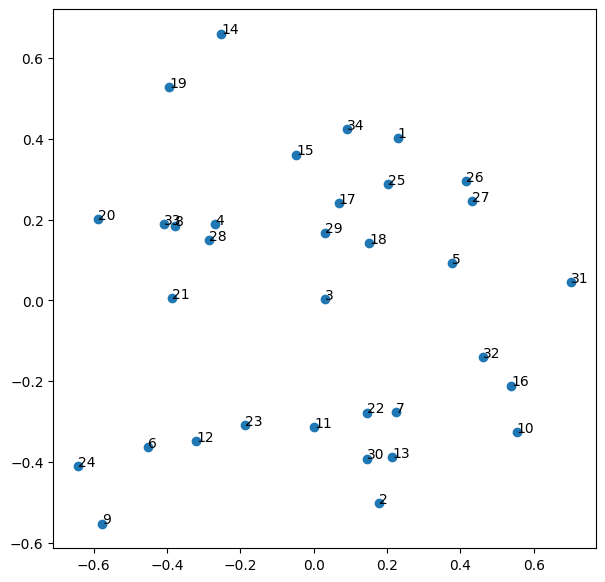

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

ax.scatter(tested[:,0], tested[:,1])

for i in range(tested.shape[0]):
    ax.annotate(str(i+1), (tested[i,0], tested[i,1]))